In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv('../data/crc_combined.csv', index_col=0)
data_mut = pd.read_csv('../data/crc_mut.csv', index_col=0)
data_cna = pd.read_csv('../data/crc_cna.csv', index_col=0)
data_clin = pd.read_csv('../data/crc_clin.csv', index_col=0)
data_out = pd.read_csv('../data/crc_out.csv', index_col=0)

In [18]:
data_reg = pd.read_csv('../data/crc_treat_reg.csv')
data_ib = pd.read_csv('../data/crc_treat_ib.csv')

In [19]:
reg_patients = data_reg['PATIENT_ID'].unique()
ib_patients = data_ib['PATIENT_ID'].unique()

In [6]:
scores_df = pd.DataFrame(columns=['comb', 'mut', 'clin', 'cna'], index=['os', 'pfs'])
rf = RandomForestClassifier()
i = 'os'
comb_scores = cross_val_score(rf, data.drop(['out_os', 'out_pfs'], axis=1), data['out_os'], cv=5, scoring='roc_auc')
mut_scores = cross_val_score(rf, data_mut, data['out_os'], cv=5, scoring='roc_auc')
clin_scores = cross_val_score(rf, data_clin, data['out_os'], cv=5, scoring='roc_auc')
cna_scores = cross_val_score(rf, data_cna, data['out_os'], cv=5, scoring='roc_auc')
comb_mean = comb_scores.mean()
comb_95ci = 1.96*comb_scores.std()/np.sqrt(5)
mut_mean = mut_scores.mean()
mut_95ci = 1.96*mut_scores.std()/np.sqrt(5)
clin_mean = clin_scores.mean()
clin_95ci = 1.96*clin_scores.std()/np.sqrt(5)
cna_mean = cna_scores.mean()
cna_95ci = 1.96*cna_scores.std()/np.sqrt(5)
scores_df.loc[i, 'comb'] = str(round(comb_mean, 3)) + ' +/- ' + str(round(comb_95ci, 3))
scores_df.loc[i, 'mut'] = str(round(mut_mean, 3)) + ' +/- ' + str(round(mut_95ci, 3))
scores_df.loc[i, 'clin'] = str(round(clin_mean, 3)) + ' +/- ' + str(round(clin_95ci, 3))
scores_df.loc[i, 'cna'] = str(round(cna_mean, 3)) + ' +/- ' + str(round(cna_95ci, 3))
scores_df


,comb,mut,clin,cna
os,0.723 +/- 0.015,0.58 +/- 0.024,0.69 +/- 0.01,0.563 +/- 0.021
pfs,NaN,NaN,NaN,NaN


In [7]:
i = 'pfs'
comb_scores = cross_val_score(rf, data.drop(['out_os', 'out_pfs'], axis=1), data['out_pfs'], cv=5, scoring='roc_auc')
mut_scores = cross_val_score(rf, data_mut, data['out_pfs'], cv=5, scoring='roc_auc')
clin_scores = cross_val_score(rf, data_clin, data['out_pfs'], cv=5, scoring='roc_auc')
cna_scores = cross_val_score(rf, data_cna, data['out_pfs'], cv=5, scoring='roc_auc')
comb_mean = comb_scores.mean()
comb_95ci = 1.96*comb_scores.std()/np.sqrt(5)
mut_mean = mut_scores.mean()
mut_95ci = 1.96*mut_scores.std()/np.sqrt(5)
clin_mean = clin_scores.mean()
clin_95ci = 1.96*clin_scores.std()/np.sqrt(5)
cna_mean = cna_scores.mean()
cna_95ci = 1.96*cna_scores.std()/np.sqrt(5)
scores_df.loc[i, 'comb'] = str(round(comb_mean, 3)) + ' +/- ' + str(round(comb_95ci, 3))
scores_df.loc[i, 'mut'] = str(round(mut_mean, 3)) + ' +/- ' + str(round(mut_95ci, 3))
scores_df.loc[i, 'clin'] = str(round(clin_mean, 3)) + ' +/- ' + str(round(clin_95ci, 3))
scores_df.loc[i, 'cna'] = str(round(cna_mean, 3)) + ' +/- ' + str(round(cna_95ci, 3))
scores_df

,comb,mut,clin,cna
os,0.723 +/- 0.015,0.58 +/- 0.024,0.69 +/- 0.01,0.563 +/- 0.021
pfs,0.542 +/- 0.046,0.522 +/- 0.032,0.607 +/- 0.056,0.487 +/- 0.041


In [39]:
#filter all the datasets to include only ib patients and then run the same analysis
data_types = ['combined', 'mut', 'cna', 'clin']
data_dict = {}
for i in data_types:
    data_dict[i] = pd.read_csv('../data/crc_{}.csv'.format(i), index_col=0)
ib_dfs = {}
reg_dfs = {}
for i in data_types:
    ib_dfs[str(i)] = data_dict[i][data_dict[i].index.isin(ib_patients)]
    reg_dfs[str(i)] = data_dict[i][data_dict[i].index.isin(reg_patients)]


In [40]:
#get the shape of the overall data
print(ib_dfs['combined'].shape, reg_dfs['combined'].shape)

(129, 556) (96, 556)


In [44]:
#get the scores for the ib patients and the reg patients
scores_df = pd.DataFrame(columns=['combined', 'mut', 'clin', 'cna'], index=['os', 'pfs'])
rf = RandomForestClassifier()
i = 'os'
comb_scores = cross_val_score(rf, ib_dfs['combined'].drop(['out_os', 'out_pfs'], axis=1), ib_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
mut_scores = cross_val_score(rf, ib_dfs['mut'], ib_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
clin_scores = cross_val_score(rf, ib_dfs['clin'], ib_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
cna_scores = cross_val_score(rf, ib_dfs['cna'], ib_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
comb_mean = comb_scores.mean()
comb_95ci = 1.96*comb_scores.std()/np.sqrt(5)
mut_mean = mut_scores.mean()
mut_95ci = 1.96*mut_scores.std()/np.sqrt(5)
clin_mean = clin_scores.mean()
clin_95ci = 1.96*clin_scores.std()/np.sqrt(5)
cna_mean = cna_scores.mean()
cna_95ci = 1.96*cna_scores.std()/np.sqrt(5)
scores_df.loc[i, 'combined'] = str(round(comb_mean, 3)) + ' +/- ' + str(round(comb_95ci, 3))
scores_df.loc[i, 'mut'] = str(round(mut_mean, 3)) + ' +/- ' + str(round(mut_95ci, 3))
scores_df.loc[i, 'clin'] = str(round(clin_mean, 3)) + ' +/- ' + str(round(clin_95ci, 3))
scores_df.loc[i, 'cna'] = str(round(cna_mean, 3)) + ' +/- ' + str(round(cna_95ci, 3))
scores_df


,combined,mut,clin,cna
os,0.663 +/- 0.105,0.677 +/- 0.075,0.57 +/- 0.156,0.576 +/- 0.121
pfs,NaN,NaN,NaN,NaN


In [45]:
#get the scores for the ib patients and the reg patients
rf = RandomForestClassifier()
i = 'pfs'
comb_scores = cross_val_score(rf, ib_dfs['combined'].drop(['out_os', 'out_pfs'], axis=1), ib_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
mut_scores = cross_val_score(rf, ib_dfs['mut'], ib_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
clin_scores = cross_val_score(rf, ib_dfs['clin'], ib_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
cna_scores = cross_val_score(rf, ib_dfs['cna'], ib_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
comb_mean = comb_scores.mean()
comb_95ci = 1.96*comb_scores.std()/np.sqrt(5)
mut_mean = mut_scores.mean()
mut_95ci = 1.96*mut_scores.std()/np.sqrt(5)
clin_mean = clin_scores.mean()
clin_95ci = 1.96*clin_scores.std()/np.sqrt(5)
cna_mean = cna_scores.mean()
cna_95ci = 1.96*cna_scores.std()/np.sqrt(5)
scores_df.loc[i, 'combined'] = str(round(comb_mean, 3)) + ' +/- ' + str(round(comb_95ci, 3))
scores_df.loc[i, 'mut'] = str(round(mut_mean, 3)) + ' +/- ' + str(round(mut_95ci, 3))
scores_df.loc[i, 'clin'] = str(round(clin_mean, 3)) + ' +/- ' + str(round(clin_95ci, 3))
scores_df.loc[i, 'cna'] = str(round(cna_mean, 3)) + ' +/- ' + str(round(cna_95ci, 3))
scores_df

,combined,mut,clin,cna
os,0.663 +/- 0.105,0.677 +/- 0.075,0.57 +/- 0.156,0.576 +/- 0.121
pfs,0.685 +/- 0.101,0.688 +/- 0.054,0.551 +/- 0.143,0.58 +/- 0.119


In [46]:
def eval_dtypes(model, data_dict):
    scores_df = pd.DataFrame(columns=['combined', 'mut', 'clin', 'cna'], index=['os', 'pfs'])
    rf = model
    i = 'os'
    comb_scores = cross_val_score(rf, reg_dfs['combined'].drop(['out_os', 'out_pfs'], axis=1), reg_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
    mut_scores = cross_val_score(rf, reg_dfs['mut'], reg_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
    clin_scores = cross_val_score(rf, reg_dfs['clin'], reg_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
    cna_scores = cross_val_score(rf, reg_dfs['cna'], reg_dfs['combined']['out_os'], cv=5, scoring='roc_auc')
    comb_mean = comb_scores.mean()
    comb_95ci = 1.96*comb_scores.std()/np.sqrt(5)
    mut_mean = mut_scores.mean()
    mut_95ci = 1.96*mut_scores.std()/np.sqrt(5)
    clin_mean = clin_scores.mean()
    clin_95ci = 1.96*clin_scores.std()/np.sqrt(5)
    cna_mean = cna_scores.mean()
    cna_95ci = 1.96*cna_scores.std()/np.sqrt(5)
    scores_df.loc[i, 'combined'] = str(round(comb_mean, 3)) + ' +/- ' + str(round(comb_95ci, 3))
    scores_df.loc[i, 'mut'] = str(round(mut_mean, 3)) + ' +/- ' + str(round(mut_95ci, 3))
    scores_df.loc[i, 'clin'] = str(round(clin_mean, 3)) + ' +/- ' + str(round(clin_95ci, 3))
    scores_df.loc[i, 'cna'] = str(round(cna_mean, 3)) + ' +/- ' + str(round(cna_95ci, 3))
    i = 'pfs'
    comb_scores = cross_val_score(rf, reg_dfs['combined'].drop(['out_os', 'out_pfs'], axis=1), reg_dfs['combined']['out_pfs'], cv=5, scoring='roc_auc')
    mut_scores = cross_val_score(rf, reg_dfs['mut'], reg_dfs['combined']['out_pfs'], cv=5, scoring='roc_auc')
    clin_scores = cross_val_score(rf, reg_dfs['clin'], reg_dfs['combined']['out_pfs'], cv=5, scoring='roc_auc')
    cna_scores = cross_val_score(rf, reg_dfs['cna'], reg_dfs['combined']['out_pfs'], cv=5, scoring='roc_auc')
    comb_mean = comb_scores.mean()
    comb_95ci = 1.96*comb_scores.std()/np.sqrt(5)
    mut_mean = mut_scores.mean()
    mut_95ci = 1.96*mut_scores.std()/np.sqrt(5)
    clin_mean = clin_scores.mean()
    clin_95ci = 1.96*clin_scores.std()/np.sqrt(5)
    cna_mean = cna_scores.mean()
    cna_95ci = 1.96*cna_scores.std()/np.sqrt(5)
    scores_df.loc[i, 'combined'] = str(round(comb_mean, 3)) + ' +/- ' + str(round(comb_95ci, 3))
    scores_df.loc[i, 'mut'] = str(round(mut_mean, 3)) + ' +/- ' + str(round(mut_95ci, 3))
    scores_df.loc[i, 'clin'] = str(round(clin_mean, 3)) + ' +/- ' + str(round(clin_95ci, 3))
    scores_df.loc[i, 'cna'] = str(round(cna_mean, 3)) + ' +/- ' + str(round(cna_95ci, 3))
    return scores_df
    

In [47]:
reg_df = eval_dtypes(RandomForestClassifier(), reg_dfs)
ib_df = eval_dtypes(RandomForestClassifier(), ib_dfs)

/home/kchen/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/home/kchen/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/kchen/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/home/kchen/.local/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 399, in _score
    return self._sign * self._score_func(y, y_pred, **self._kwargs)
  File "/home/kchen/.local/lib/python3.10/site-packages/sklearn/metrics/_ranking.py", line 572, in roc_auc_score
    return _average_binary_score(
  File "/home/kchen/.local/lib/python3.10/site-packages/sklea

In [48]:
reg_df

,combined,mut,clin,cna
os,0.691 +/- 0.101,0.679 +/- 0.126,0.611 +/- 0.158,0.563 +/- 0.109
pfs,nan +/- nan,nan +/- nan,nan +/- nan,nan +/- nan


In [49]:
ib_df

,combined,mut,clin,cna
os,0.69 +/- 0.095,0.682 +/- 0.135,0.561 +/- 0.192,0.527 +/- 0.143
pfs,nan +/- nan,nan +/- nan,nan +/- nan,nan +/- nan


In [51]:
reg_dfs['combined']['out_pfs'].value_counts()

out_pfs
0.0    94
1.0     2
Name: count, dtype: int64

In [56]:
reg_dfs['mut']['mut_KRAS'].value_counts()

mut_KRAS
0.0    51
1.0    45
Name: count, dtype: int64

In [61]:
pd.crosstab(reg_dfs['combined']['mut_BRAF'], reg_dfs['combined']['out_os'])

out_os,0.0,1.0
mut_BRAF,,
0.0,64,24
1.0,6,2


In [53]:
X = reg_dfs['combined'].drop(['out_os', 'out_pfs'], axis=1)
y = reg_dfs['combined']['out_os']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:

X = data.drop(['out_os', 'out_pfs'], axis=1)
y = data['out_os']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

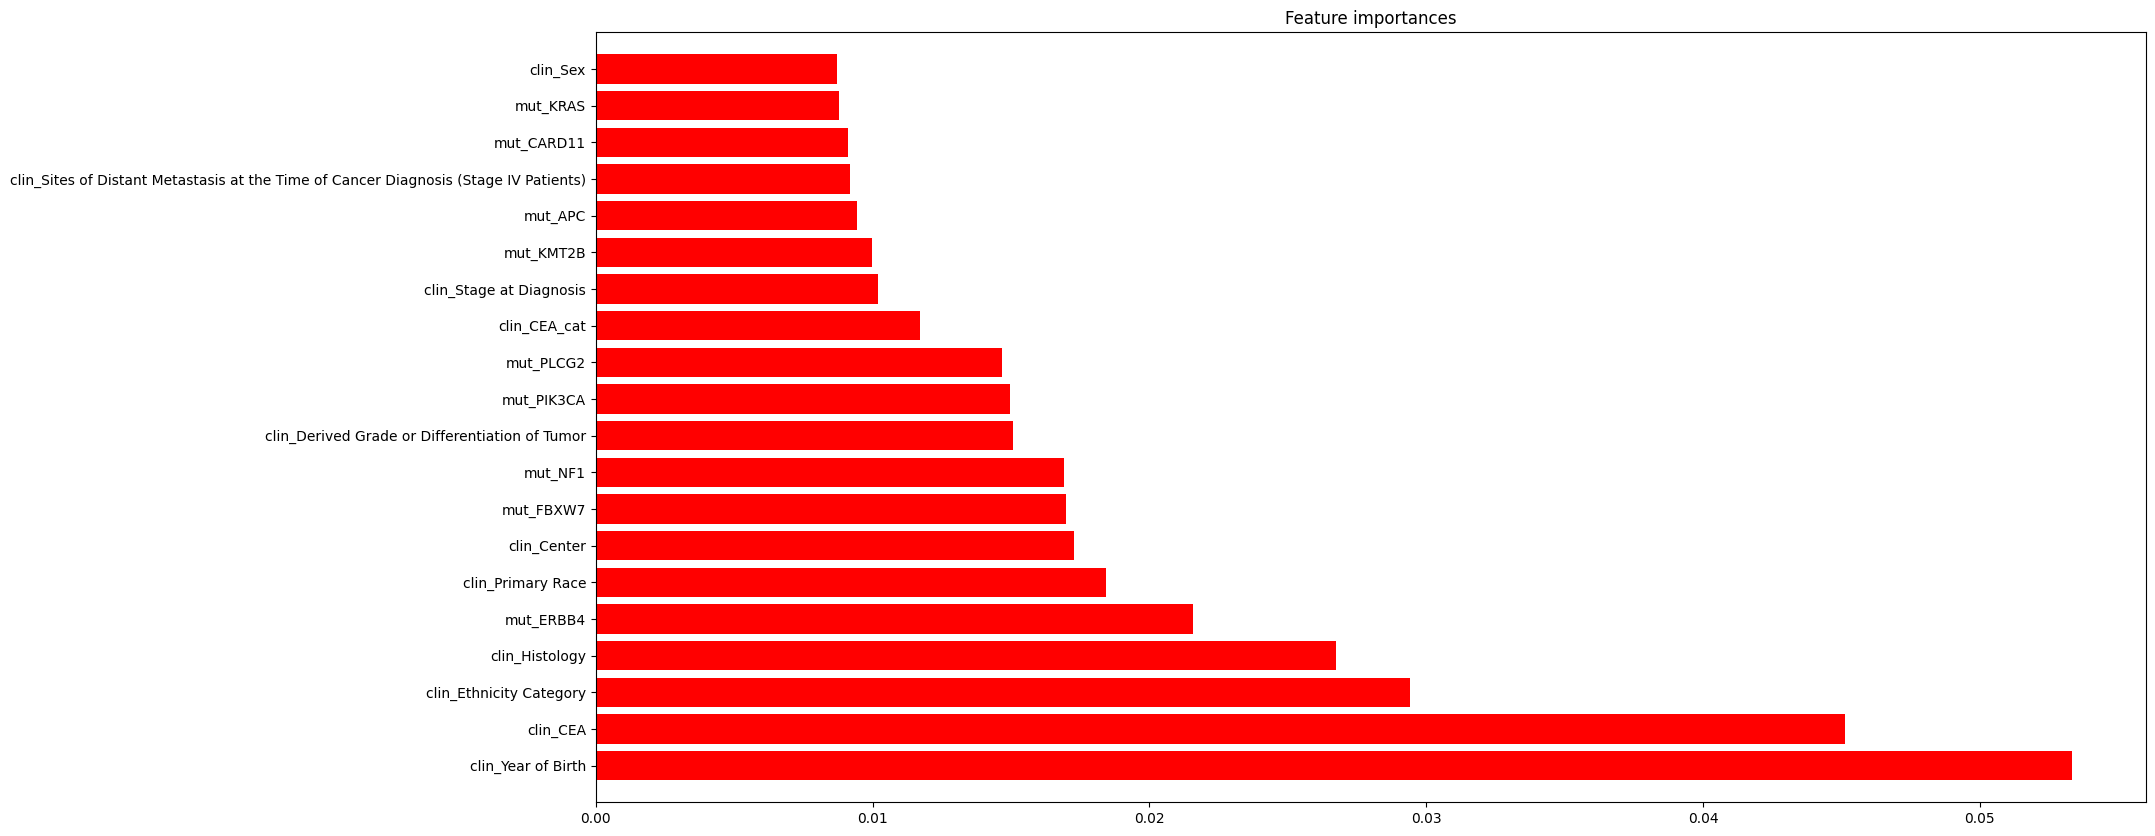

In [54]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
#get top 20 feature importances and plot as a horizontal bar chart
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.title("Feature importances")
plt.barh(range(20), importances[indices][:20], color="r", align="center")
plt.yticks(range(20), X.columns[indices][:20])
plt.ylim([-1, 20])
plt.savefig('../results/feature_importances.png')



In [ ]:
d

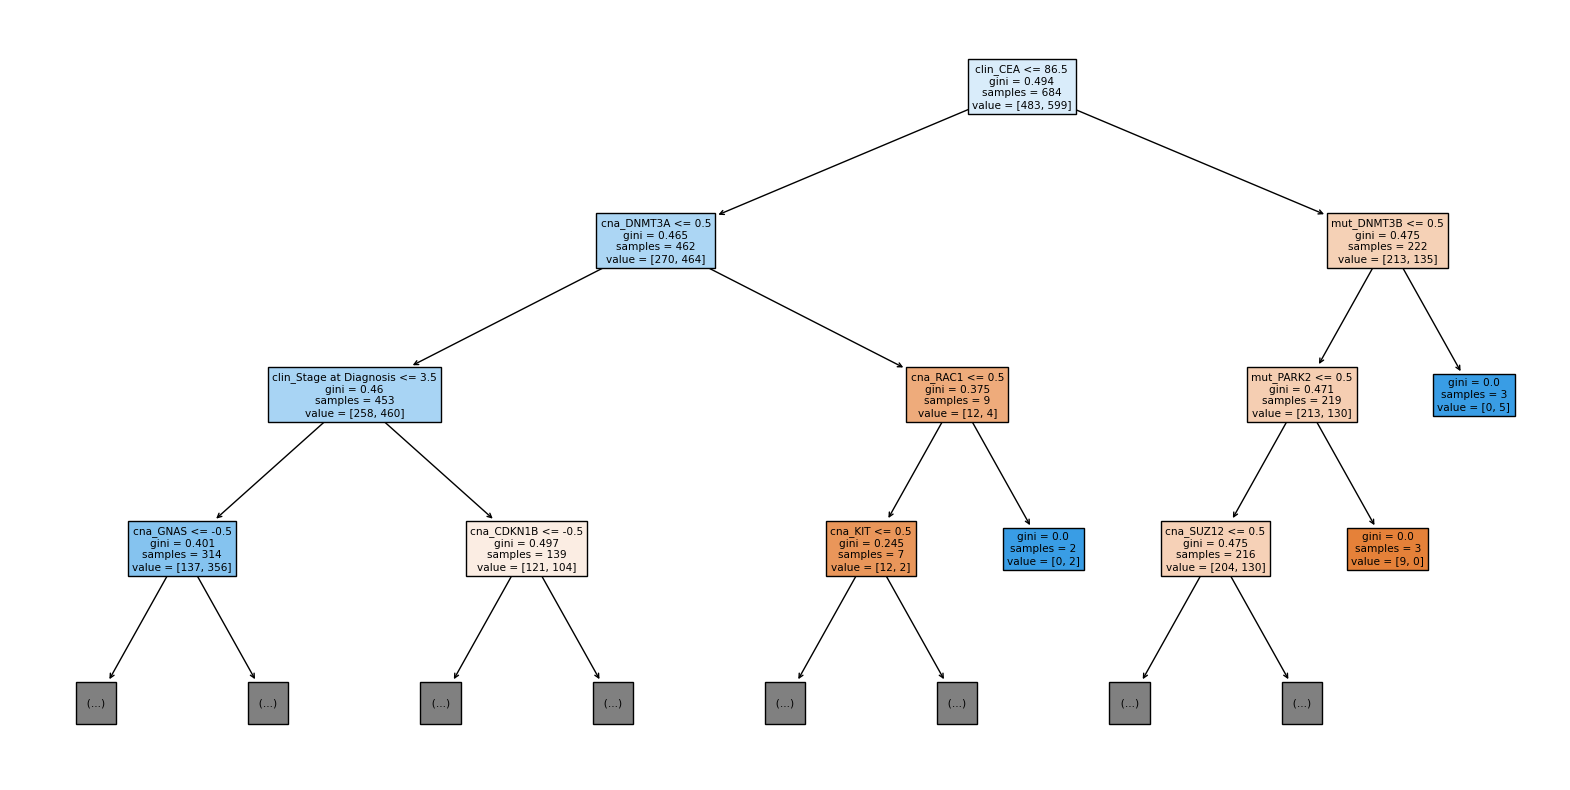

In [10]:
#get the first decision tree from the random forest
from sklearn import tree

#make it bigger and save it
plt.figure(figsize=(20,10))
tree.plot_tree(rf.estimators_[0], feature_names=X.columns, filled=True, max_depth=3)
plt.savefig('../results/tree.png', dpi=300)